In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

from itertools import product
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /Users/thomo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
stopwords = set(stopwords.words('english'))
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)

data = pd.read_csv('dataset/HotelReviews/Datafiniti_Hotel_Reviews_Jun19.csv')
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-01-06T00:00:00Z,NaN,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-08-22T00:00:00Z,NaN,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-03-21T00:00:00Z,NaN,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateAdded   

In [36]:
data['reviews.title'] = data['reviews.title'].fillna('No title')
data['dateUpdated'] = pd.to_datetime(data['dateUpdated']).dt.date
data = data.drop(['id', 'dateAdded', 'keys', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.sourceURLs', 'sourceURLs', 'websites'], axis=1)
data.head()

,dateUpdated,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,2019-05-20,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,3,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018
1,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,4,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N
2,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,3,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah
3,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,5,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M
4,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D


In [37]:
data["country"].unique()

array(['US'], dtype=object)

In [38]:
data = data.drop('country', axis=1)
data.head()

,dateUpdated,address,categories,primaryCategories,city,latitude,longitude,name,postalCode,province,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,2019-05-20,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,3,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018
1,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,4,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N
2,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,3,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah
3,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,5,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M
4,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D


In [39]:
print(data['primaryCategories'].value_counts())
print()
print(data['city'].value_counts())
print()
print(data['name'].value_counts())

Accommodation & Food Services                                                              9991
Accommodation & Food Services,Arts Entertainment & Recreation                                 7
Accommodation & Food Services,Administrative & Support & Waste Management & Remediation       1
Accommodation & Food Services,Agriculture                                                     1
Name: primaryCategories, dtype: int64

San Diego        1189
San Francisco     808
New Orleans       798
Atlanta           762
Orlando           734
                 ... 
Saratoga            1
Holland             1
Miramar Beach       1
Millsboro           1
Lindale             1
Name: city, Length: 842, dtype: int64

Hyatt House Seattle/Downtown                          209
Hotel Emma                                            183
French Market Inn                                     144
St. James Hotel, an Ascend Hotel Collection Member    136
Grand Hyatt Seattle                                   135
      

<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

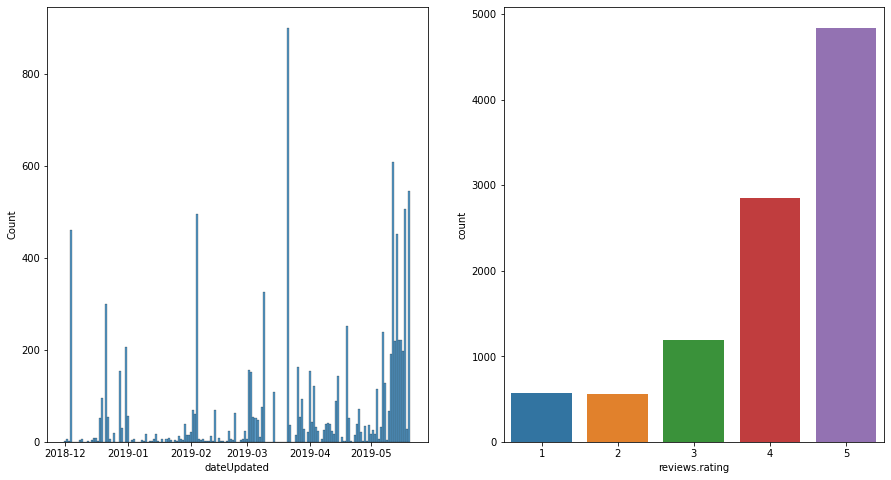

In [40]:
data = data.drop('primaryCategories', axis=1)
_, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x='dateUpdated', data=data, ax=axes[0])
sns.countplot(x='reviews.rating', data=data, ax=axes[1])

In [41]:
data['nlp_text'] = data['reviews.text'].apply(lambda x: ' '.join([corpus for corpus in x.split() if corpus not in stopwords]))
data['nlp_text']

0       This hotel nice quiet. Did know, train track n...
1       We stayed king suite separation bedroom living...
2       Parking horrible, somebody ran rental car stay...
3       Not cheap excellent location. Price somewhat s...
4       If get room advertised website paid, may lucky...
                              ...                        
9995    My friends I took trip Hampton Basslights show...
9996    check departure, staff friendly, professional ...
9997    This Hampton located quiet street across hospi...
9998    Awesome wings (my favorite garlic parmesan) gr...
9999    Clean facility freeway ..... staff friendly ef...
Name: nlp_text, Length: 10000, dtype: object

In [42]:
def polarity(text):
    text_blob = TextBlob(text)
    polarity = text_blob.sentiment.polarity
    return polarity


def subjectivity(text):
    testimonial = TextBlob(text)
    subjectivity = testimonial.subjectivity
    return subjectivity


data['text_pola'] = data['nlp_text'].apply(lambda x: polarity(x))
data['text_subj'] = data['nlp_text'].apply(lambda x: subjectivity(x))
data['title_pola'] = data['reviews.title'].apply(lambda x: polarity(x))
data['title_subj'] = data['reviews.title'].apply(lambda x: subjectivity(x))
data.head()

,dateUpdated,address,categories,city,latitude,longitude,name,postalCode,province,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,nlp_text,text_pola,text_subj,title_pola,title_subj
0,2019-05-20,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Goleta,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,3,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,"This hotel nice quiet. Did know, train track n...",0.340000,0.406667,0.500000,0.15
1,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,4,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,We stayed king suite separation bedroom living...,0.327778,0.433333,0.183333,0.40
2,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,3,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,"Parking horrible, somebody ran rental car stay...",-0.350000,0.650000,0.000000,0.00
3,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,5,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,Not cheap excellent location. Price somewhat s...,0.495238,0.714286,0.910000,0.78
4,2019-05-20,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Carmel by the Sea,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,"If get room advertised website paid, may lucky...",0.214286,0.485714,0.000000,0.15


In [43]:
province_df = data.groupby('province')[['reviews.rating', 'text_pola', 'title_pola']]\
                .agg(
                    count = ('reviews.rating', 'count'),
                    rating_min=('reviews.rating', 'min'), 
                    rating_max=('reviews.rating', 'max'),
                    rating_avg=('reviews.rating', np.mean),
                    text_pola_min=('text_pola', 'min'), 
                    text_pola_max=('text_pola', 'max'),
                    text_pola_avg=('text_pola', np.mean),
                    title_pola_min=('title_pola', 'min'), 
                    title_pola_max=('title_pola', 'max'),
                    title_pola_avg=('title_pola', np.mean),                    
                )
province_df

,count,rating_min,rating_max,rating_avg,text_pola_min,text_pola_max,text_pola_avg,title_pola_min,title_pola_max,title_pola_avg
province,,,,,,,,,,
AK,10,3,5,4.500000,0.067576,0.516224,0.343103,-0.80,1.0,0.385417
AL,63,1,5,4.301587,-0.062857,0.668333,0.326384,-0.60,1.0,0.407800
AR,44,1,5,3.795455,-0.287500,0.633333,0.272405,-1.00,1.0,0.269072
AZ,122,1,5,4.057377,-0.183766,0.734091,0.310844,-0.91,1.0,0.366324
CA,2647,1,5,3.999622,-0.700000,1.000000,0.287104,-1.00,1.0,0.383501
CO,103,1,5,4.009709,-0.260606,1.000000,0.324027,-1.00,1.0,0.337752
DE,6,2,5,3.666667,0.183333,0.900000,0.439653,-0.35,1.0,0.496667
FL,1277,1,5,4.006265,-1.000000,1.000000,0.288878,-1.00,1.0,0.364293
GA,844,1,5,3.927725,-0.875000,1.000000,0.278994,-1.00,1.0,0.353682


In [44]:
province_df = province_df.drop('RI', axis=0)
top3_rating = province_df.sort_values(by='rating_avg', ascending=False)[:3]
bottom3_rating = province_df.sort_values(by='rating_avg', ascending=True)[:3]
display(top3_rating)
display(bottom3_rating)

,count,rating_min,rating_max,rating_avg,text_pola_min,text_pola_max,text_pola_avg,title_pola_min,title_pola_max,title_pola_avg
province,,,,,,,,,,
NM,39,2,5,4.512821,0.129375,0.649188,0.369349,-0.2,1.0,0.433991
AK,10,3,5,4.500000,0.067576,0.516224,0.343103,-0.8,1.0,0.385417
UT,83,2,5,4.493976,-0.268750,0.662000,0.344239,-0.7,1.0,0.497351


,count,rating_min,rating_max,rating_avg,text_pola_min,text_pola_max,text_pola_avg,title_pola_min,title_pola_max,title_pola_avg
province,,,,,,,,,,
NJ,50,1,5,2.020000,-0.492857,0.36375,0.055374,-1.0,0.8,-0.088595
KY,60,1,5,3.600000,-0.400000,0.80000,0.243334,-1.0,1.0,0.261215
MS,17,1,5,3.647059,-0.075000,0.70000,0.283233,-1.0,1.0,0.179565


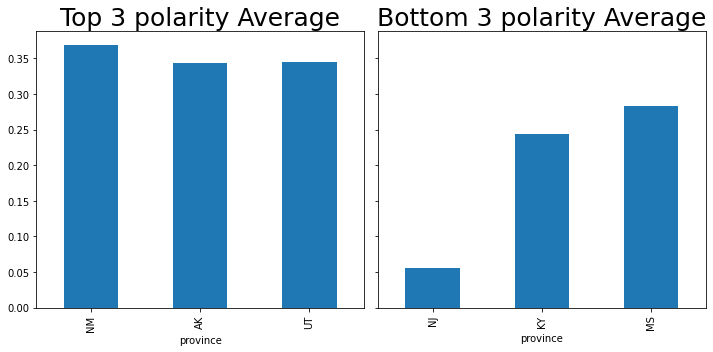

In [45]:
_, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
top3_rating['text_pola_avg'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 3 polarity Average', fontsize=25)
bottom3_rating['text_pola_avg'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Bottom 3 polarity Average', fontsize=25)
plt.tight_layout()
plt.show()

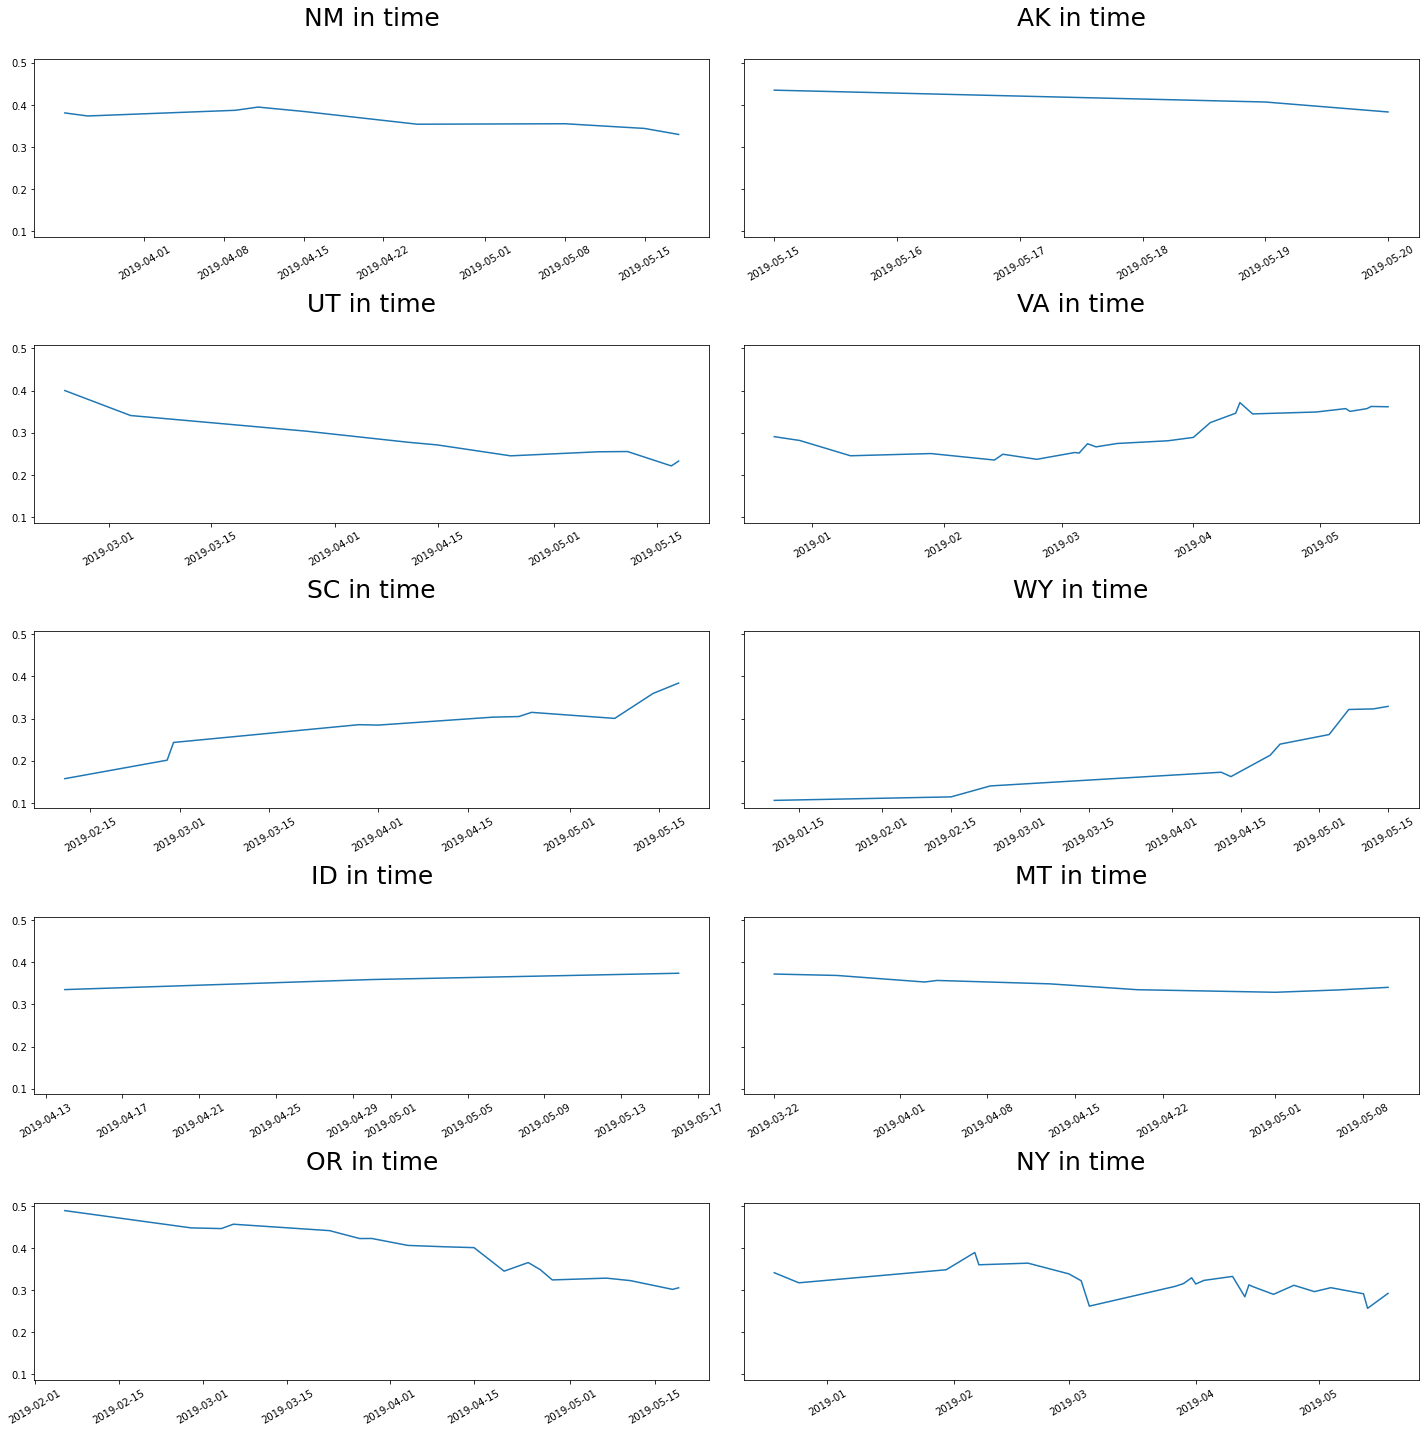

In [46]:
top10_pola_provinces = province_df.sort_values(by='rating_avg', ascending=False)[:10].index
_, axes = plt.subplots(5, 2, figsize=(20, 20), sharey=True)
indices = product([0, 1, 2, 3, 4], [0, 1])


for idx, province in zip(indices, top10_pola_provinces):
    pola_per_province = data.query("province==@province").groupby('dateUpdated').agg(date_pola=('text_pola', np.mean))
    pola_per_province = pola_per_province.sort_index()
    pola_per_province['moving_avg'] = pola_per_province.date_pola.rolling(10, min_periods=3).mean()
    
    axes[idx[0], idx[1]].set_title(f'{province} in time\n', fontsize=25)
    axes[idx[0], idx[1]].plot(pola_per_province.index, pola_per_province.moving_avg)
    axes[idx[0], idx[1]].tick_params(axis='x', labelrotation= 30)
    
plt.tight_layout()